# goals:
1. Identify at least six factors that affect the GDP of a country. 
2. Apply any linear and non-linear model on the dataset with these six factors and 
3. compare the two models to find which gives a more accurate prediction. 

# step1: importing essential modules and packages

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# step2: Data Collection - Completeness and correctness of data collection

In [2]:
# df stands for DataFrame
df = pd.read_csv('gdpWorld.csv')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


# step3: Data preparation - cleansing and preparing data for the next steps of model development

## remove the ',' and insert '.' in its place in chosen columns of DataFrame 

In [3]:
# modify all the columns with ',' and replace it with '.'

# column index number of modifiable columns
n_col = (4,5,6,7,9,10,11,12,13,15,16,17,18,19)

# capturing the modifiable column names
mod_col_names = df.columns[[n_col]]

# modification function
def mod_func(value):
    return float('.'.join(value.split(',')))


for col_name in mod_col_names:
    
    # filter to get only the not-nan cells of the columns
    not_nan = ~df[col_name].isna()
    
    # apply the modification function on each column to replace ',' with '.'
    df.loc[not_nan,col_name] = df[col_name][not_nan].apply(mod_func)

    
    
    

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [4]:
# behold our beautiful DataFrame without any awkward ',' in between values.
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.0,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.0,15.0,75.0,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.0,497.2,2.22,0.0,97.78,3,8.71,6.25,NaN,NaN,NaN


## removing NaN values and replacing them with apt values

In [5]:
# checking for empty cells with null values
null_series = df.isna().sum() 
null_series 

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [6]:
# to get rid off those values that are 0
null_series = null_series[null_series > 0]
null_series

Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [7]:
null_series.index

Index(['Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [8]:
null_series.values

array([ 3,  3,  1, 18,  4,  2,  2,  2, 22,  3,  4, 15, 16, 15],
      dtype=int64)

In [9]:
null_series.sort_values()

GDP ($ per capita)                     1
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Net migration                          3
Infant mortality (per 1000 births)     3
Birthrate                              3
Phones (per 1000)                      4
Deathrate                              4
Agriculture                           15
Service                               15
Industry                              16
Literacy (%)                          18
Climate                               22
dtype: int64

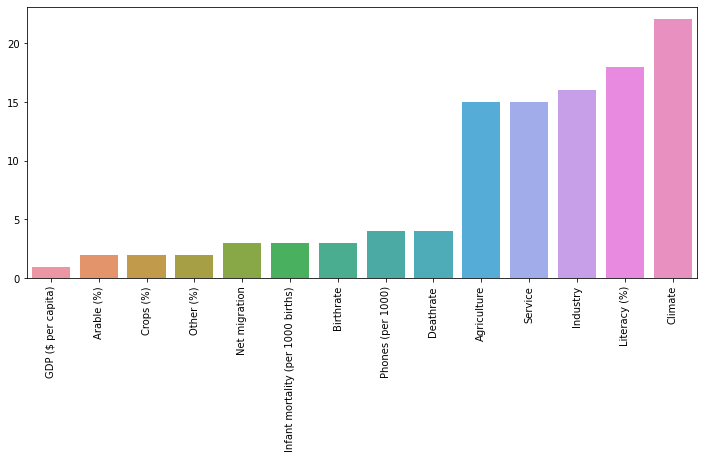

In [10]:
null_series = df.isna().sum() 
null_series = null_series[null_series > 0]
null_series = null_series.sort_values()
plt.figure(figsize=(12,5))
sns.barplot(x=null_series.index,y=null_series.values)
plt.xticks(rotation=90)
plt.show()

In [11]:
# lets deal with the null values of Net migration

In [12]:
df[df['Net migration'].isna()]['Net migration']

47     NaN
221    NaN
223    NaN
Name: Net migration, dtype: object

### pruning the dataframe from null/na values:
* Many of these countries are quite exotic and tourists gathering places. Not many people, if any, would have immigrated there so, we keep the Net migration to 0.
* And also if you notice, many of the columns are filled with NaN's are attached with these exotic countries only, so, the rightful thing to do now is to remove them from the DataFrame. Removing 3 countries from a total of 227 countries will not be a big dataloss.

In [13]:
indices_to_drop = df[df['Net migration'].isna()]['Net migration'].index
df = df.drop(indices_to_drop)
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.0,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.0,15.0,75.0,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.0,497.2,2.22,0.0,97.78,3,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Virgin Islands,LATIN AMER. & CARIB,108605,1910,56.9,9.84,-8.94,8.03,17200.0,NaN,652.8,11.76,2.94,85.3,2,13.96,6.43,0.01,0.19,0.8
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.9,18.97,64.13,3,31.67,3.92,0.09,0.28,0.63
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.0,61.5,800.0,50.2,37.2,2.78,0.24,96.98,1,42.89,8.3,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.0,88.29,800.0,80.6,8.2,7.08,0.03,92.9,2,41.0,19.93,0.22,0.29,0.489


### now lets see how many more columns are there with null cells

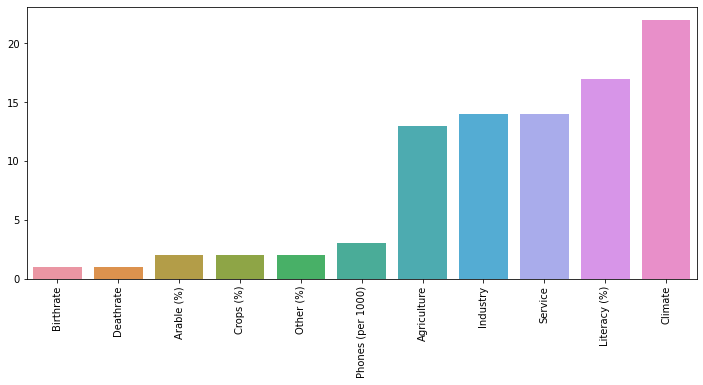

In [14]:
null_series = df.isna().sum() 
null_series = null_series[null_series > 0]
null_series = null_series.sort_values()
plt.figure(figsize=(12,5))
sns.barplot(x=null_series.index,y=null_series.values)
plt.xticks(rotation=90)
plt.show()

### lets deal with Literacy (%) now:

* filling the NaN for literacy rate with 0 indicating absence of literacy or any other value such as -1 would only cause confusion and misrepresentation of the fact so, i have decided to find the group mean literacy rate based on the specific region the country with NaN for litercy rate belongs to.

In [15]:
df['Literacy (%)'].isna().sum()

17

In [16]:
df[df['Literacy (%)'].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.6,2.96,83.44,4,8.77,8.27,0.142,0.308,0.55
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.0,97.86,NaN,14.05,8.7,0.27,0.11,0.62
74,Gaza Strip,NEAR EAST,1428757,360,3968.8,11.11,1.6,22.93,600.0,NaN,244.3,28.95,21.05,50.0,3,39.45,3.8,0.03,0.283,0.687
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.0,5.13,17500.0,NaN,877.7,0.0,0.0,100.0,NaN,10.74,9.31,NaN,NaN,NaN
80,Greenland,NORTHERN AMERICA,56361,2166086,0.0,2.04,-8.37,15.82,20000.0,NaN,448.9,0.0,0.0,100.0,1,15.93,7.84,NaN,NaN,NaN
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3,8.81,10.01,0.03,0.1,0.87
99,Isle of Man,WESTERN EUROPE,75441,572,131.9,27.97,5.36,5.93,21000.0,NaN,676.0,9.0,0.0,91.0,3,11.05,11.19,0.01,0.13,0.86
104,Jersey,WESTERN EUROPE,91084,116,785.2,60.34,2.76,5.24,24800.0,NaN,811.3,0.0,0.0,100.0,3,9.3,9.28,0.05,0.02,0.93
108,Kiribati,OCEANIA,105432,811,130.0,140.94,0.0,48.52,800.0,NaN,42.7,2.74,50.68,46.58,2,30.65,8.26,0.089,0.242,0.668
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3,12.02,8.77,0.118,0.319,0.563


In [17]:
df[df['Literacy (%)'] == np.min(df['Literacy (%)'])]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
151,Niger,SUB-SAHARAN AFRICA,12525094,1267000,9.9,0.0,-0.67,121.69,800.0,17.6,1.9,3.54,0.01,96.45,1,50.73,20.91,0.39,0.17,0.44


In [18]:
df['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [19]:
region_literacy_mean = df.groupby('Region')['Literacy (%)'].transform(pd.Series.mean)
region_literacy_mean

0      79.553571
1      97.088889
2      67.240000
3      91.013333
4      98.391304
         ...    
220    90.654545
222    79.521429
224    79.521429
225    62.510000
226    62.510000
Name: Literacy (%), Length: 224, dtype: float64

In [20]:
# get the indices of the missing litercy rates
indices_of_na_lit = df[df['Literacy (%)'].isna()].index
indices_of_na_lit

Int64Index([25, 66, 74, 78, 80, 85, 99, 104, 108, 123, 134, 144, 185, 187, 209,
            220, 222],
           dtype='int64')

In [21]:
# fill the NaN in Literacy (%) with values from corresponding region_literacy_mean
df['Literacy (%)'] = df['Literacy (%)'].fillna(region_literacy_mean[indices_of_na_lit])
df['Literacy (%)']

0       36.000000
1       86.500000
2       70.000000
3       97.000000
4      100.000000
          ...    
220     90.654545
222     79.521429
224     50.200000
225     80.600000
226     90.700000
Name: Literacy (%), Length: 224, dtype: float64

In [22]:
# checking if it was effected
df['Literacy (%)'][indices_of_na_lit]

25     97.088889
66     98.391304
74     79.521429
78     98.391304
80     97.750000
85     98.391304
99     98.391304
104    98.391304
108    91.013333
123    97.088889
134    62.510000
144    91.013333
185    97.088889
187    91.013333
209    91.013333
220    90.654545
222    79.521429
Name: Literacy (%), dtype: float64

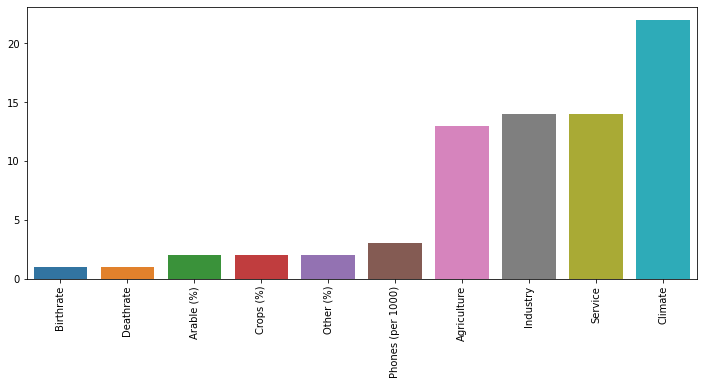

In [23]:
null_series = df.isna().sum() 
null_series = null_series[null_series > 0]
null_series = null_series.sort_values()
plt.figure(figsize=(12,5))
sns.barplot(x=null_series.index,y=null_series.values)
plt.xticks(rotation=90)
plt.show()

### lets deal with Phones(per 1000)

* 

In [24]:
df['Phones (per 1000)'].isna().sum()

3

In [25]:
# get the portion of the df where phones (per 1000) seem to be NaN
df[df['Phones (per 1000)'].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
52,Cyprus,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.6,NaN,7.79,4.44,87.77,3,12.56,7.68,0.037,0.198,0.765
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.0,47.41,500.0,58.6,NaN,4.71,0.67,94.62,2,26.99,6.24,0.085,0.231,0.684
140,Montserrat,LATIN AMER. & CARIB,9439,102,92.5,39.22,0.0,7.35,3400.0,97.0,NaN,20.0,0.0,80.0,2,17.59,7.1,NaN,NaN,NaN


### all these countries seem to have reasonably developed enough for its citizens to have phones so i am going to just take the region average and fill up NaN 

In [26]:
region_mean_phone = df.groupby('Region')['Phones (per 1000)'].transform(pd.Series.mean)
region_mean_phone

0      171.159259
1      280.750000
2      100.200000
3      188.373684
4      593.807143
          ...    
220    271.661364
222    209.113333
224    209.113333
225     42.507843
226     42.507843
Name: Phones (per 1000), Length: 224, dtype: float64

In [27]:
# indices of the countries with NaN's

indices_of_na = df[df['Phones (per 1000)'].isna()].index
indices_of_na

Int64Index([52, 58, 140], dtype='int64')

In [28]:
# fill up the nan in phones (per 1000) column in the df
df['Phones (per 1000)'] = df['Phones (per 1000)'].fillna(region_mean_phone[indices_of_na])

In [29]:
df['Phones (per 1000)'][[52,58,140]]

52     209.113333
58     171.159259
140    271.661364
Name: Phones (per 1000), dtype: float64

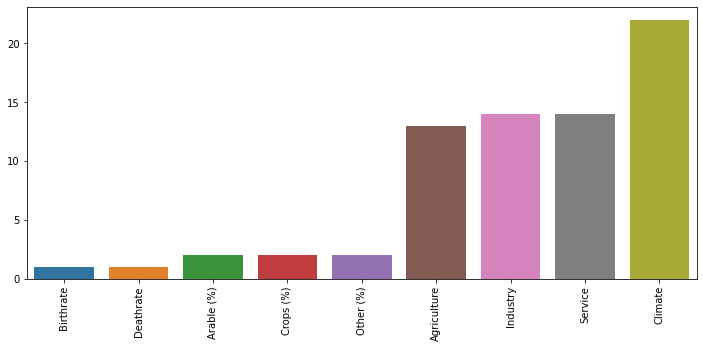

In [30]:
null_series = df.isna().sum() 
null_series = null_series[null_series > 0]
null_series = null_series.sort_values()
plt.figure(figsize=(12,5))
sns.barplot(x=null_series.index,y=null_series.values)
plt.xticks(rotation=90)
plt.show()

### lets deal with Arable(%) NaN's:



In [31]:
df['Arable (%)']

0      12.13
1      21.09
2       3.22
3       10.0
4       2.22
       ...  
220    11.76
222     16.9
224     2.78
225     7.08
226     8.32
Name: Arable (%), Length: 224, dtype: object

In [32]:
df['Arable (%)'].isna().sum()

2

In [33]:
df[df['Arable (%)'].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,98.391304,842.4,NaN,NaN,NaN,3,8.81,10.01,0.03,0.1,0.87
134,Mayotte,SUB-SAHARAN AFRICA,201234,374,538.1,49.52,6.78,62.4,2600.0,62.510000,49.7,NaN,NaN,NaN,2,40.95,7.7,NaN,NaN,NaN


* for Guernsey I have found that 2500 hectares are being used for agriculture which is 25km^2 and the total area of Guernsey is 62km^2 so total arable land is 62/25 = 40.32%
* And drop Moyotte since it has almost all of its columns filled with NaN's.

In [34]:
# dropping Mayotte
df = df.drop(134,axis=0)
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.0,6000.0,70.000000,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.0,15.0,75.0,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.000000,497.2,2.22,0.0,97.78,3,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Virgin Islands,LATIN AMER. & CARIB,108605,1910,56.9,9.84,-8.94,8.03,17200.0,90.654545,652.8,11.76,2.94,85.3,2,13.96,6.43,0.01,0.19,0.8
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.9,18.97,64.13,3,31.67,3.92,0.09,0.28,0.63
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.0,61.5,800.0,50.200000,37.2,2.78,0.24,96.98,1,42.89,8.3,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.0,88.29,800.0,80.600000,8.2,7.08,0.03,92.9,2,41.0,19.93,0.22,0.29,0.489


In [35]:
# Data is fetched from Guernsey farms association:
# https://www.guernseydairy.com/farms

df.loc[df['Country'] == 'Guernsey ','Arable (%)'] = 40.32
df.loc[df['Country'] == 'Guernsey ','Crops (%)'] = 0.01
df.loc[df['Country'] == 'Guernsey ','Other (%)'] = 96.73 # mostly they raise cattle

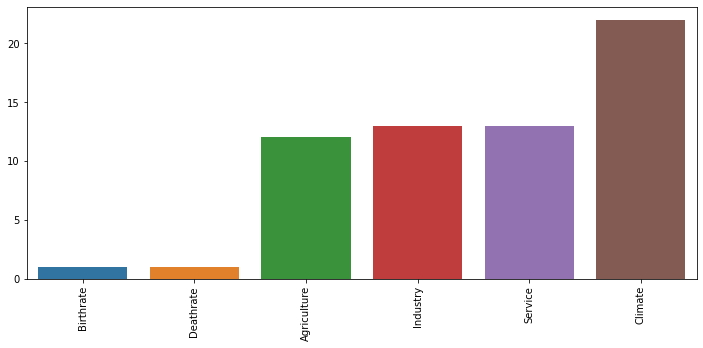

In [36]:
# lets check the NaN now
null_series = df.isna().sum() 
null_series = null_series[null_series > 0]
null_series = null_series.sort_values()
plt.figure(figsize=(12,5))
sns.barplot(x=null_series.index,y=null_series.values)
plt.xticks(rotation=90)
plt.show()


In [37]:
# lets deal with birthrate now
df['Birthrate'].isna().sum()

1

In [38]:
df[df['Birthrate'].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
181,Serbia,EASTERN EUROPE,9396411,88361,106.3,0.0,-1.33,12.89,2200.0,93.0,285.8,33.35,3.2,63.45,NaN,NaN,NaN,0.166,0.255,0.579


In [39]:
# data collected for serbia to know its birthrate and deathrate as of 2022
# https://www.stat.gov.rs/en-us/vesti/statisticalrelease/?p=14058

df.loc[df['Country'] == 'Serbia ','Birthrate'] = 9.40
df.loc[df['Country'] == 'Serbia ','Deathrate'] = 16.39

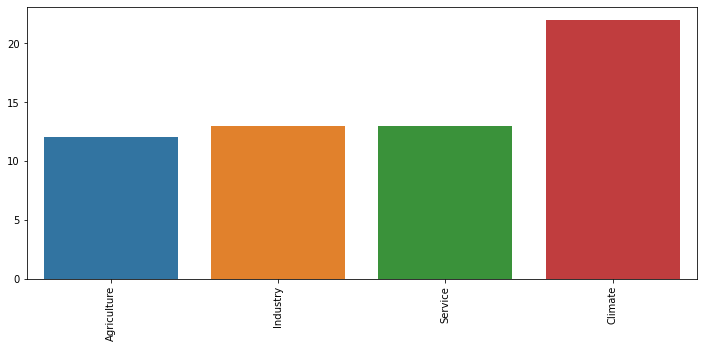

In [40]:
# lets check the NaN now
null_series = df.isna().sum() 
null_series = null_series[null_series > 0]
null_series = null_series.sort_values()
plt.figure(figsize=(12,5))
sns.barplot(x=null_series.index,y=null_series.values)
plt.xticks(rotation=90)
plt.show()


In [41]:
# lets deal with Agriculture

In [42]:
df['Agriculture'].isna().sum()

12

In [43]:
df[df['Agriculture'].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.500000,10.0,15.0,75.0,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.000000,497.200000,2.22,0.0,97.78,3,8.71,6.25,NaN,NaN,NaN
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.0,5.13,17500.0,98.391304,877.700000,0.0,0.0,100.0,NaN,10.74,9.31,NaN,NaN,NaN
80,Greenland,NORTHERN AMERICA,56361,2166086,0.0,2.04,-8.37,15.82,20000.0,97.750000,448.900000,0.0,0.0,100.0,1,15.93,7.84,NaN,NaN,NaN
83,Guam,OCEANIA,171019,541,316.1,23.20,0.0,6.94,21000.0,99.000000,492.000000,9.09,16.36,74.55,2,18.79,4.48,NaN,NaN,NaN
140,Montserrat,LATIN AMER. & CARIB,9439,102,92.5,39.22,0.0,7.35,3400.0,97.000000,271.661364,20.0,0.0,80.0,2,17.59,7.1,NaN,NaN,NaN
144,Nauru,OCEANIA,13287,21,632.7,142.86,0.0,9.95,5000.0,91.013333,143.000000,0.0,0.0,100.0,2,24.76,6.7,NaN,NaN,NaN
153,N. Mariana Islands,OCEANIA,82459,477,172.9,310.69,9.61,7.11,12500.0,97.000000,254.700000,13.04,4.35,82.61,2,19.43,2.29,NaN,NaN,NaN
171,Saint Helena,SUB-SAHARAN AFRICA,7502,413,18.2,14.53,0.0,19.0,2500.0,97.000000,293.300000,12.9,0.0,87.1,NaN,12.13,6.53,NaN,NaN,NaN
174,St Pierre & Miquelon,NORTHERN AMERICA,7026,242,29.0,49.59,-4.86,7.54,6900.0,99.000000,683.200000,13.04,0.0,86.96,NaN,13.52,6.83,NaN,NaN,NaN


In [44]:
# since the countries with NaN for agriculture also do not have value for industries and services we are dropping it

columns_to_check = 'Agriculture'

df.dropna(subset=columns_to_check,inplace=True)

In [45]:
# checking 
df['Agriculture'].isna().sum()

0

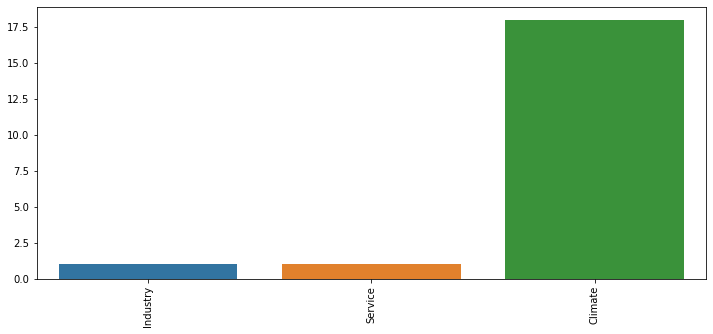

In [46]:
# lets check the NaN now
null_series = df.isna().sum() 
null_series = null_series[null_series > 0]
null_series = null_series.sort_values()
plt.figure(figsize=(12,5))
sns.barplot(x=null_series.index,y=null_series.values)
plt.xticks(rotation=90)
plt.show()


In [47]:
df[df['Industry'].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.0,7.75,5.43,27000.0,99.0,1035.6,0.0,0.0,100.0,NaN,9.19,12.91,0.17,NaN,NaN


### since there are no significant industry and services (except few financial services which are neglible) in monaco we set the values to zero

In [48]:
columns_to_fill = ['Industry','Service']

df[columns_to_fill] = df[columns_to_fill].fillna(0)

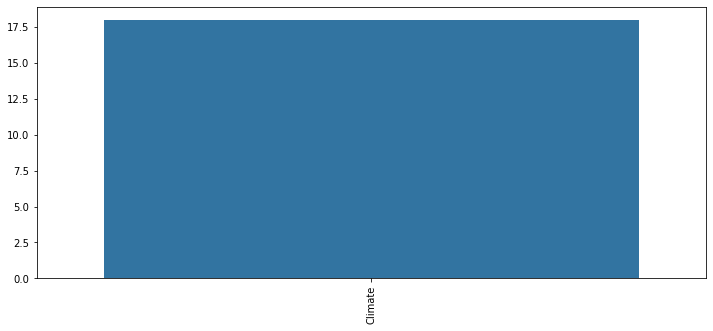

In [49]:
# lets check the NaN now
null_series = df.isna().sum() 
null_series = null_series[null_series > 0]
null_series = null_series.sort_values()
plt.figure(figsize=(12,5))
sns.barplot(x=null_series.index,y=null_series.values)
plt.xticks(rotation=90)
plt.show()


In [50]:
df[df['Climate'].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.0,191.19,1900.0,42.000000,7.8,2.41,0.24,97.35,NaN,45.11,24.2,0.096,0.658,0.246
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.000000,552.2,4.96,0.02,95.02,NaN,10.78,7.8,0.022,0.294,0.684
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.500000,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.07,0.308,0.622
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,98.391304,503.8,2.14,0.0,97.86,NaN,14.05,8.7,0.27,0.110,0.620
101,Italy,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.600000,430.9,27.79,9.53,62.68,NaN,8.72,10.4,0.021,0.291,0.688
115,Lebanon,NEAR EAST,3874050,10400,372.5,2.16,0.0,24.52,4800.0,87.400000,255.6,16.62,13.98,69.4,NaN,18.52,6.21,0.12,0.210,0.670
118,Libya,NORTHERN AFRICA,5900754,1759540,3.4,0.10,0.0,24.6,6400.0,82.600000,127.1,1.03,0.19,98.78,NaN,26.49,3.48,0.076,0.499,0.425
120,Lithuania,BALTICS,3585906,65200,55.0,0.14,-0.71,6.89,11400.0,99.600000,223.4,45.22,0.91,53.87,NaN,8.75,10.98,0.055,0.325,0.620
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.000000,515.4,23.28,0.4,76.32,NaN,11.94,8.41,0.01,0.130,0.860
129,Malta,WESTERN EUROPE,400214,316,1266.5,62.28,2.07,3.89,17700.0,92.800000,505.0,28.13,3.13,68.74,NaN,10.22,8.1,0.03,0.230,0.740


### since climate value is insignificant we drop it(the decision to call it insignificant comes from the lack of knowledge of what the values of climate meant).

In [51]:

df = df.drop('Climate',axis=1)
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.6,20.34,0.38,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.0,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,0.101,0.600,0.298
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.0,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,45.11,24.2,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.0,0.0,100.0,14.17,5.34,0.04,0.180,0.780


In [52]:
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

###  drop the region as it is wordy and useless from now (we want everything to be in numerical form in df)

In [53]:
df = df.drop('Region',axis=1)
df.head(5)

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.6,20.34,0.38,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.0,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,0.101,0.600,0.298
5,Angola,12127071,1246700,9.7,0.13,0.0,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,45.11,24.2,0.096,0.658,0.246
6,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.0,0.0,100.0,14.17,5.34,0.04,0.180,0.780


### make the country column the df's index

In [54]:
df.set_index('Country',inplace=True)

In [55]:
df.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.6,20.34,0.38,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.0,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,0.101,0.600,0.298
Angola,12127071,1246700,9.7,0.13,0.0,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,45.11,24.2,0.096,0.658,0.246
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.0,0.0,100.0,14.17,5.34,0.04,0.180,0.780


# step3: Identify at least six factors that affect the GDP of a country. 

* we will use PCA(principal component analysis) to identify those six factors that affect the GDP the most.
* PCA works by taking the covariance matrix of the mean-centered values of the columns of df DataFrame.
* we then find Eigen decomposition (take eigen values and corresponding eigen vectors) for the covariance matrix.
* we then take 6 highest eigen values(indicating the column with most variance) and the corresponding eigen vector(eigen vector is like a door that needs to be unlocked with the right eigen value.
* we take this eigen vector and multiply with the original matrix to get the PCA matrix(Z = XV). where X is original DataFrame df and V is eigen vector with 6 largest eigen values.
* we select the most important 6 features among all features (all columns) because we want our model to perform faster and also to help us identify the most important features.

In [56]:
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,0.22,87.65,46.6,20.34,0.38,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.0,6000.0,70.000000,78.1,3.22,0.25,96.53,17.14,4.61,0.101,0.600,0.298
Angola,12127071,1246700,9.7,0.13,0.0,191.19,1900.0,42.000000,7.8,2.41,0.24,97.35,45.11,24.2,0.096,0.658,0.246
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.000000,460.0,0.0,0.0,100.0,14.17,5.34,0.04,0.180,0.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands,108605,1910,56.9,9.84,-8.94,8.03,17200.0,90.654545,652.8,11.76,2.94,85.3,13.96,6.43,0.01,0.190,0.800
West Bank,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.9,18.97,64.13,31.67,3.92,0.09,0.280,0.630
Yemen,21456188,527970,40.6,0.36,0.0,61.5,800.0,50.200000,37.2,2.78,0.24,96.98,42.89,8.3,0.135,0.472,0.393


### procedure:

1. Standardize the features.
2. Apply PCA to the standardized features.
3. Extract the top six principal components

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standardize the features
scaled_df = StandardScaler().fit_transform(df)
scaled_df

array([[ 1.16981527e-03,  8.38645328e-03, -1.92545476e-01, ...,
         1.56103265e+00, -3.04623159e-01, -1.07699740e+00],
       [-2.24528786e-01, -3.27380377e-01, -1.47447891e-01, ...,
         5.52844208e-01, -6.79491407e-01,  9.73876167e-02],
       [ 1.65565098e-02,  9.49474754e-01, -2.12680429e-01, ...,
        -3.39538807e-01,  2.29061856e+00, -1.56091485e+00],
       ...,
       [-7.76968704e-02, -5.64767055e-02, -1.96902161e-01, ...,
        -1.07927948e-01,  1.36786595e+00, -1.00027878e+00],
       [-1.59466337e-01,  6.54267451e-02, -2.11797317e-01, ...,
         4.71099199e-01,  5.58270796e-02, -4.33741286e-01],
       [-1.53430299e-01, -1.31031624e-01, -2.02377456e-01, ...,
         1.91803751e-01, -2.82996145e-01,  9.73876167e-02]])

In [58]:
# Apply PCA
pca = PCA()
pca.fit(scaled_df)



PCA()

In [104]:
# get the indices of top 6 features
np.abs(pca.components_[0,:]) # we take the absolute value to avoid sign uncertainty due to eigen decomposition from PCA

array([0.00509265, 0.01672196, 0.0993139 , 0.06623594, 0.08012799,
       0.39949337, 0.347756  , 0.35013368, 0.373655  , 0.06819591,
       0.01481382, 0.0406578 , 0.39006448, 0.22805942, 0.35033543,
       0.0353113 , 0.31877306])

In [105]:
np.argsort(np.abs(pca.components_[0,:])) # sort the indices from lowest values to highest

array([ 0, 10,  1, 15, 11,  3,  9,  4,  2, 13, 16,  6,  7, 14,  8, 12,  5],
      dtype=int64)

In [107]:
np.argsort(np.abs(pca.components_[0,:]))[-6:] # get the most important components

array([ 6,  7, 14,  8, 12,  5], dtype=int64)

In [63]:
top_6_indices = np.argsort(np.abs(pca.components_[0,:]))[-6:] 
top_6_indices

array([ 3, 10, 16,  9, 14, 13], dtype=int64)

In [108]:
# get the names of the original features
feature_names = df.columns
feature_names

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service'],
      dtype='object')

In [110]:
top_six_feature_names = [feature_names[i] for i in top_6_indices]
top_six_feature_names

['Coastline (coast/area ratio)',
 'Crops (%)',
 'Service',
 'Arable (%)',
 'Agriculture',
 'Deathrate']

## conclusion:

* therefore it is known that the 6 most important features in the df were
1. coastline(coast/area ratio)
2. crops(%)
3. service(%)
4. Arable(%)
5. Agriculture
6. Deathrate.

### how Gdp changes with service of a country?

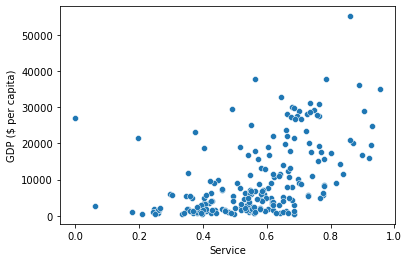

In [66]:
sns.scatterplot(data=df,x='Service',y='GDP ($ per capita)')
plt.show()

### conclusion: countries that provide more services fare well!!

### how GDP changes with Agriculture of the country.

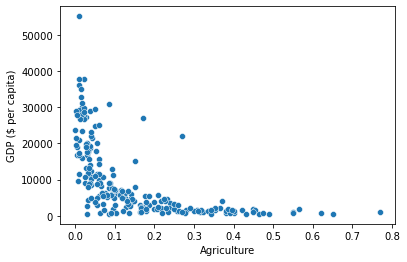

In [67]:
sns.scatterplot(data=df,x='Agriculture',y='GDP ($ per capita)')
plt.show()

### conclusion: Countries whose primary source of income is derived from Agriculture seem to have lesser GDP per capita(lesser ability of the people to spend their money on goods and services)

### how Deathrate affects GDP per capita

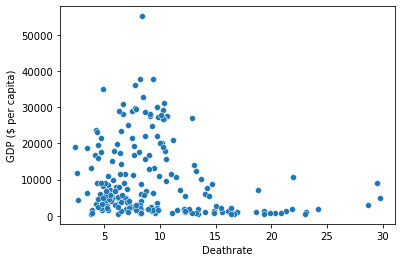

In [68]:
sns.scatterplot(data=df,x='Deathrate',y='GDP ($ per capita)')
plt.show()

### conclusion: it is also a right-skewed distribution meaning lesser the better

### comparing crops(%) with Gdp per capita

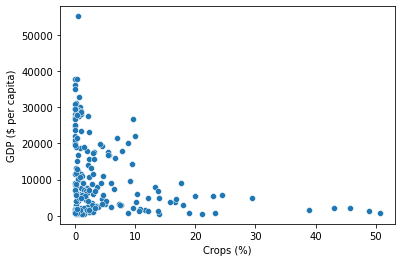

In [69]:
sns.scatterplot(data=df,x='Crops (%)',y='GDP ($ per capita)')
plt.show()

### conclusion: less crops producing countries seem to have higher GDP per capita

### comparing Arable (%) with GDP per capita

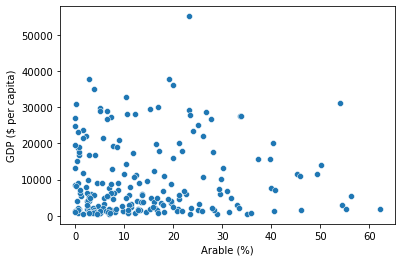

In [70]:
sns.scatterplot(data=df,x='Arable (%)',y='GDP ($ per capita)')
plt.show()

### conclusion: The concentration of most data points on the left side suggests a possible trend where countries with lower Arability tend to have higher GDP per capita. However, due to the high variance and dispersion of the data, this conclusion remains inconclusive.


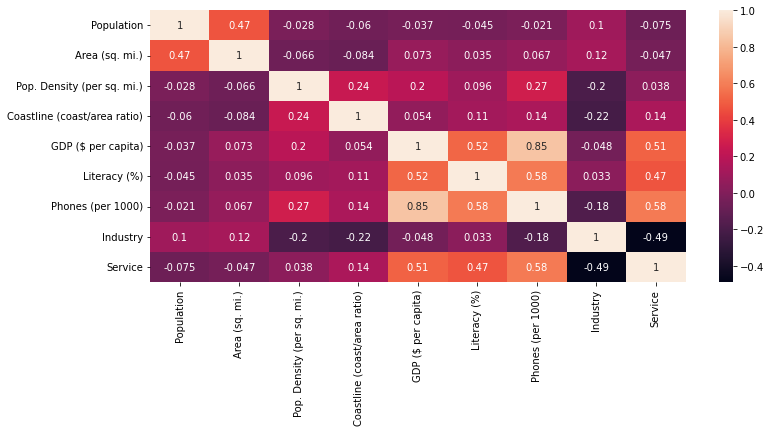

In [71]:
# see the correlation matrix

plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

### conclusion: we see that in correlation matrix along with services, phones per 1000 and literacy rate also are highly correlated with GDP per capita

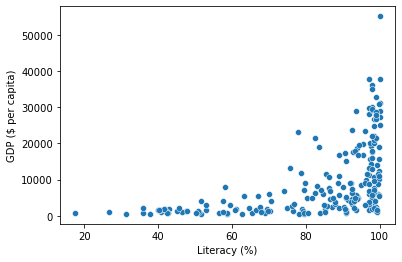

In [72]:
sns.scatterplot(data=df,x='Literacy (%)',y='GDP ($ per capita)')
plt.show()

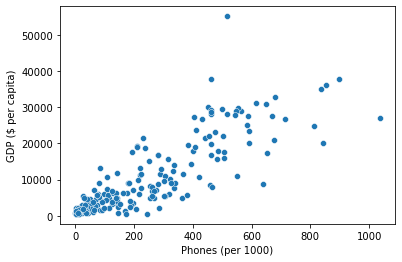

In [73]:
sns.scatterplot(data=df,x='Phones (per 1000)',y='GDP ($ per capita)')
plt.show()

### conclusion: as had been doubted before, Information technology(phones)  and literacy rate seem to have positive correlation with GDP per capita.

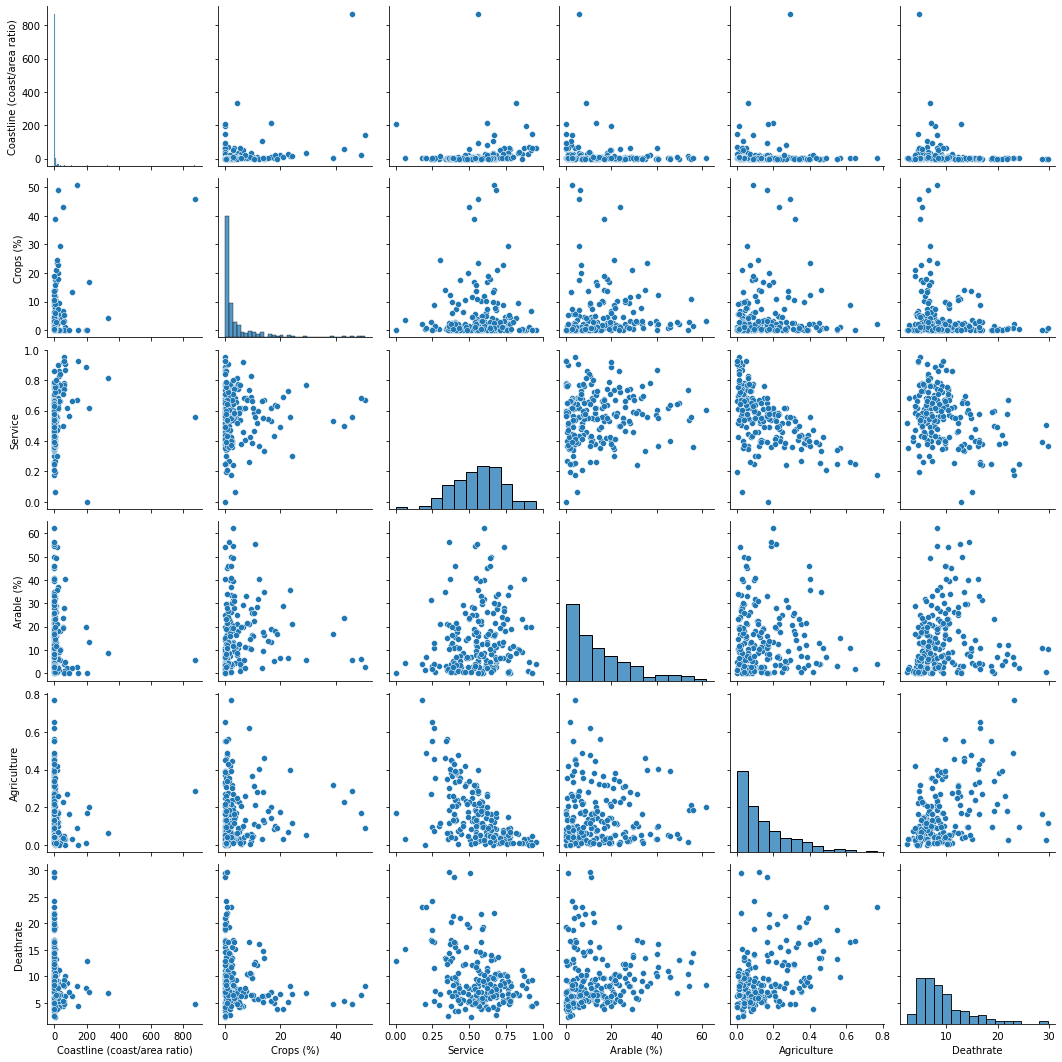

In [74]:
### since creating pairplot is computationally expensive we are concerned with only most important 6 features 
sns.pairplot(df[top_six_feature_names]);

# step 3- Model Building: Build the model with the right selection of the parameters

### choosing the independent and dependent variables

In [75]:
X = df[top_six_feature_names]
y = df['GDP ($ per capita)']

In [76]:
X

,Coastline (coast/area ratio),Crops (%),Service,Arable (%),Agriculture,Deathrate
Country,,,,,,
Afghanistan,0.00,0.22,0.380,12.13,0.38,20.34
Albania,1.26,4.42,0.579,21.09,0.232,5.22
Algeria,0.04,0.25,0.298,3.22,0.101,4.61
Angola,0.13,0.24,0.246,2.41,0.096,24.2
Anguilla,59.80,0.0,0.780,0.0,0.04,5.34
...,...,...,...,...,...,...
Virgin Islands,9.84,2.94,0.800,11.76,0.01,6.43
West Bank,0.00,18.97,0.630,16.9,0.09,3.92
Yemen,0.36,0.24,0.393,2.78,0.135,8.3


In [77]:
y

Country
Afghanistan          700.0
Albania             4500.0
Algeria             6000.0
Angola              1900.0
Anguilla            8600.0
                    ...   
Virgin Islands     17200.0
West Bank            800.0
Yemen                800.0
Zambia               800.0
Zimbabwe            1900.0
Name: GDP ($ per capita), Length: 211, dtype: float64

## 2 models we can choose for task are:

1. Linear Regression_ for its simplicity.
2. Random Forest _for handling non-linearity if there any be.

Given our dataset with six features for X and GDP per capita for y, here are two models we could consider to better predict GDP per capita:

1. **Linear Regression:**
* Linear regression is a simple and widely used approach for predicting a continuous variable like GDP per capita. 
* It assumes a linear relationship between the independent variables (features) and the dependent variable (GDP per capita). 
* we can use the Ordinary Least Squares (OLS) method to estimate the coefficients of the linear model.

2. **Random Forest Regressor:**
* Random Forest is an ensemble learning method that can be used for both classification and regression tasks. 
* In the case of regression, it builds multiple decision trees during training and outputs the mean prediction of the individual trees. 
* Random Forest tends to handle non-linear relationships well and is `robust to overfitting`, making it a good choice when the relationship between features and GDP per capita may be complex.
* we can also add Ada Booster for additional robustness to overfitting on the training data.
* AdaBoostRegressor is an ensemble learning method that combines multiple weak learners (in this case, decision trees) to create a strong learner. 


## 1.LinearRegression 

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [79]:
# train test splitting the data

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [80]:
# normalizing the data set
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [81]:
# get the model rolling
lr_model = LinearRegression()
lr_model.fit(scaled_x_train,y_train)

LinearRegression()

In [82]:
actual = y_test
prediction = lr_model.predict(scaled_x_test)
prediction

array([-3714.65230783, 13960.58116693, 13094.6214978 , 12726.61302027,
       13045.95364941,  8789.09699932, 11257.54460144, 15102.45240843,
       15461.53757657, 12620.17938291, 15779.52312652, 13091.00700182,
        9871.08520745,  2951.3907229 , 15147.12037315, 17094.00066912,
       10624.96751428, 11074.67915918,  7758.2287087 , 13465.31963185,
       18647.19166533, 13911.02556374, 15107.17363121, 16747.64948498,
        8641.7578289 ,  1879.95847872, 11509.83535324, 13053.10973493,
       11965.56702964, 11591.79466056, 12494.26136925,  6688.53966805,
        8425.00933587, 16205.88251332, 15545.57433183, 21696.00758383,
        8580.76847433, 10936.85787098,   550.66049117, 18861.51655677,
       17930.51716405,  7710.14350552, 12170.7093761 ])

## Model Evaluation

### lets see how much the actual values differ from our model's prediction using these metrics:


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:



All of these are **loss functions**, because we want to minimize them.

In [83]:
mae = mean_absolute_error(actual,prediction)
mse = mean_squared_error(actual,prediction)
rmse = np.sqrt(mse)

print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))


MAE: 7546.646102100922
MSE: 100629860.7535044
RMSE: 10031.443602667783


### how to check whether these metrics are within reasonable bounds? To know that we must check with the mean and standard deviation values of GDP(dependent variable)

In [84]:
np.mean(y)

In [85]:
np.std(y)

### conclusion: given that the mean and standard deviation are big values themselves, it's no wonder our prediction could as well be off by 7500 or 10000 as measured by mae and rmse respectively.

## Model Fine tuning 

- improving the performance of the model by fine tuning its hyper parameters.
- we use a technique called cross validation to make the algorithm choose the best value among a myriad of values.

### can we reduce the error rate by any means?  let's try to mitigate it with net_elastic shall we?

* net elastic is a combination of both ridge and lasso regularization techniques that penalize the model with higher coefficients by adding a bias term(penalizing term) to the error metric.
* Elastic Net combines the penalties of ridge regression and lasso in an attempt to get the best of both worlds!
* **mse + lasso_penalty + ridge_penalty**



In [86]:
from sklearn.linear_model import ElasticNetCV

In [87]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],
                             alphas=[0.1,1,5,10,50,100],
                             tol=0.01)

In [88]:
elastic_model.fit(x_train,y_train)

ElasticNetCV(alphas=[0.1, 1, 5, 10, 50, 100],
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [89]:
elastic_model.coef_ # it nullified the coefficients of certain features who were a hindrance to generalizing well to unseen data.

array([ 2.01696225e+01, -3.08417605e+02,  1.32462831e+04, -1.70675167e+01,
       -2.68840323e+04, -1.91911543e-01])

In [90]:
elastic_model.l1_ratio_

In [91]:
elastic_model.alpha_

In [92]:
en_prediction = elastic_model.predict(x_test) # en stands for elastic net
actual = y_test

In [93]:
mae = mean_absolute_error(actual,prediction)
mse = mean_squared_error(actual,prediction)
rmse = np.sqrt(mse)

print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MAE: 7546.646102100922
MSE: 100629860.7535044
RMSE: 10031.443602667783


## conclusion: it hasn't improved its performance with elastic net regularization 

## 2. Random Forest method

- to deal with non-linear aspect of the data
- lets see if this model improves our performance.

### Blueprint:
1. create a function to train the model and do evaluation at the same time.
2. do the model fine tuning on the fly by playing with different values or via cross validation or grid search.

In [94]:
def run_model(model,x_train,y_train,x_test,y_test):
    
    scaler = StandardScaler()
    scaled_x_train = scaler.fit_transform(x_train)
    scaled_x_test = scaler.transform(x_test)
    
    # Fit Model
    model.fit(scaled_x_train,y_train)
    
    # Get predictions and actuals
    prediction = model.predict(scaled_x_test)
    actual = y_test
    
    # Get evaluation
    mae = mean_absolute_error(actual,prediction)
    mse = mean_squared_error(actual,prediction)
    rmse = np.sqrt(mse)
    
    print("MAE: {}".format(mae))
    print("MSE: {}".format(mse))
    print("RMSE: {}".format(rmse))

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [96]:
model = RandomForestRegressor()
run_model(model,x_train,y_train,x_test,y_test)

MAE: 4610.6511627906975
MSE: 47001148.930232555
RMSE: 6855.738394238257


## conclusion: that's a lot of improvement

In [97]:
model = AdaBoostRegressor()
run_model(model,x_train,y_train,x_test,y_test)

MAE: 5347.757032837306
MSE: 64151306.51144196
RMSE: 8009.4510742897955


## conclusion: it doesn't seem to perform as better as vanilla random forest model

## Try to fine tune the random forest regressor and ada boost regressor to see which performs better now.

In [98]:
# lets first check for random forest regressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}

model = RandomForestRegressor()
grid = GridSearchCV(model,param_grid)
run_model(grid,x_train,y_train,x_test,y_test)

MAE: 5112.954636634209
MSE: 56288511.37684234
RMSE: 7502.566985828406


## conclusion: as we can see it doesn't perform as good as with default values in vanilla version

In [99]:
# now lets check for AdaBoostRegressor
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of estimators (weak learners)
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate shrinks the contribution of each weak learner
    'loss': ['linear', 'square', 'exponential']  # Loss function to use when updating weights
}

model = AdaBoostRegressor()
grid = GridSearchCV(model,param_grid)
run_model(grid,x_train,y_train,x_test,y_test)

MAE: 5254.179573238887
MSE: 61960124.15706212
RMSE: 7871.4753481836


## conclusion: still it is not as good as the vanilla random forest regressor so the winner is `RandomForestRegressor`

# final model presentation:

In [100]:
final_model = RandomForestRegressor()
run_model(final_model,x_train,y_train,x_test,y_test)

MAE: 4468.53488372093
MSE: 44418576.62790698
RMSE: 6664.726298049079


# Demo of the working of our model

In [101]:
coast_area_ratio = 10 
crops_percent = 2 
service = 3 
arable_percent = 0.25 
agriculture = 0.25 
death_rate = 1

prediction = final_model.predict([[coast_area_ratio,crops_percent,service,arable_percent,agriculture,death_rate]])

print("Estimated GDP per capita for a country with those attributes is: {}".format(prediction))

Estimated GDP per capita for a country with those attributes is: [6956.]


In [102]:
coast_area_ratio = 15
crops_percent = 2 
service = 0.2 
arable_percent = 0.25 
agriculture = 5
death_rate = 1 

prediction = final_model.predict([[coast_area_ratio,crops_percent,service,arable_percent,agriculture,death_rate]])

print("Estimated GDP per capita for a country with those attributes is: {}".format(prediction))

Estimated GDP per capita for a country with those attributes is: [4083.]


In [103]:
coast_area_ratio = 1
crops_percent = 0
service = 0
arable_percent = 0
agriculture = 0.01
death_rate = 9

prediction = final_model.predict([[coast_area_ratio,crops_percent,service,arable_percent,agriculture,death_rate]])

print("Estimated GDP per capita for a country with those attributes is: {}".format(prediction))

Estimated GDP per capita for a country with those attributes is: [6780.]
